In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context='notebook', ticks = True, grid = False)

In [18]:
#Load the data

tweets_df = pd.read_csv('/Users/anshumantewary/Downloads/Projects/NLP - Twitter Sentiment Analysis/twitter.csv')
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [19]:
tweets_df.info() #No null elements

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [20]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [21]:
tweets_df = tweets_df.drop(['id'], axis = 1) #Drop column which is not required

In [22]:
tweets_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


## Perform Data Exploration

<AxesSubplot:>

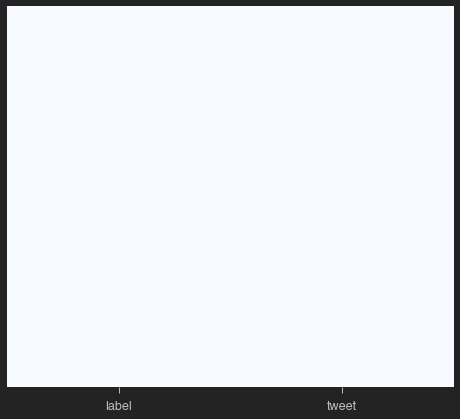

In [23]:
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar = False, cmap="Blues")

#We do not have null elements

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

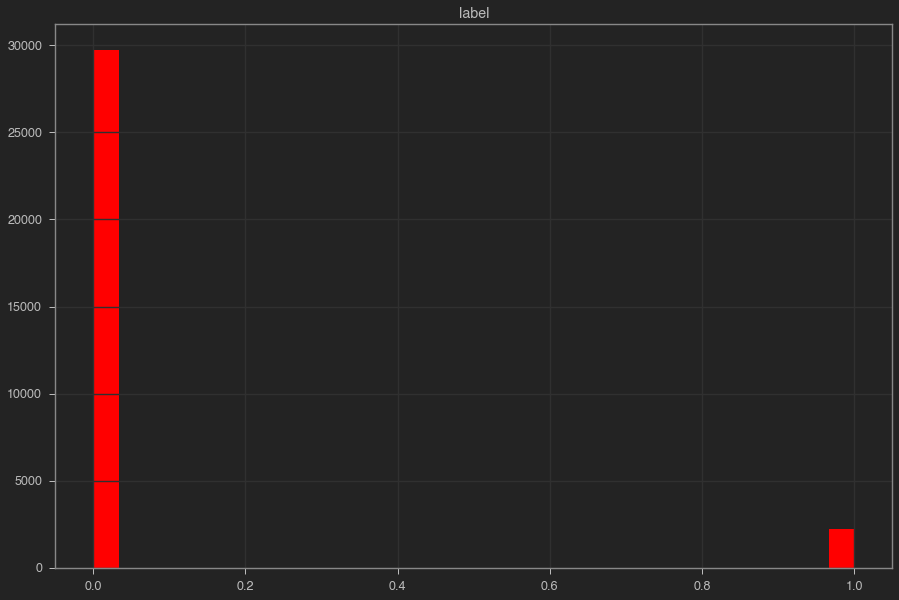

In [24]:
#Lets plot a histogram

tweets_df.hist(bins = 30, figsize = (15,10), color = "Red")

#30k entries with label 0 and 1k entries with label 1: Data is biased

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

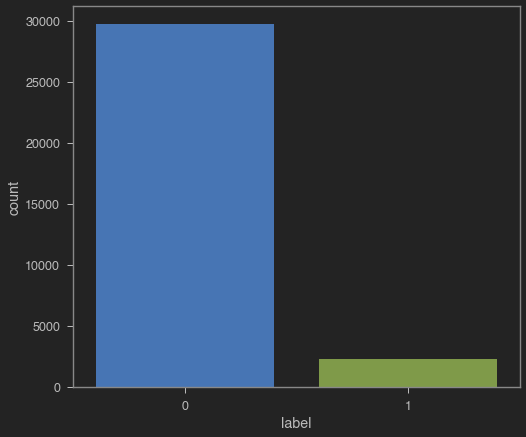

In [25]:
sns.countplot(tweets_df['label'])

In [26]:
#Lets count the length of messages in the tweet

tweets_df['length']=tweets_df['tweet'].apply(len)
tweets_df.describe()

#Min - 11, longest - 274

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [27]:
#Lets find the shortest tweet with length 11

tweets_df[tweets_df['length']==11]

,label,tweet,length
25195,0,i love you,11


In [28]:
tweets_df[tweets_df['length']> np.mean(tweets_df['length'])]['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
3        #model   i love u take with u all the time in ...
5        [2/2] huge fan fare and big talking before the...
7        the next school year is the year for exams.ð...
                               ...                        
31950     @user you can try to 'tail' us to stop, 'butt...
31953    good morning #instagram #shower #water #berlin...
31954    #holiday   bull up: you will dominate your bul...
31955    less than 2 weeks ð
ðð¼ð¹ððµ @us...
31958      to see nina turner on the airwaves trying to...
Name: tweet, Length: 17847, dtype: object

<AxesSubplot:>

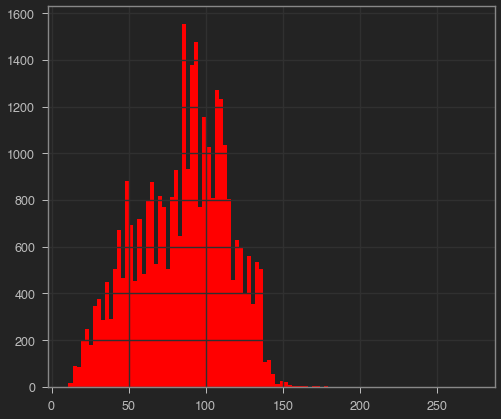

In [29]:
#Lets plot a histogram of the length column

tweets_df['length'].hist(bins = 100, color = "Red")

## Plot the wordcloud

In [30]:
#Lets divide the dataset in labels and plot wordclouds accordingly

positive = tweets_df[tweets_df['label']==0]
positive.count

<bound method DataFrame.count of        label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]>

In [31]:
negative = tweets_df[tweets_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [32]:
#Lets combine tweets together to a sentence

sentence = tweets_df['tweet'].tolist()
len(sentence)

31962

In [33]:
#!pip install wordcloud

In [34]:
sentence_as_one = " ".join(sentence) #Join the sentences together as one sentence separed by " "

In [35]:
from wordcloud import WordCloud

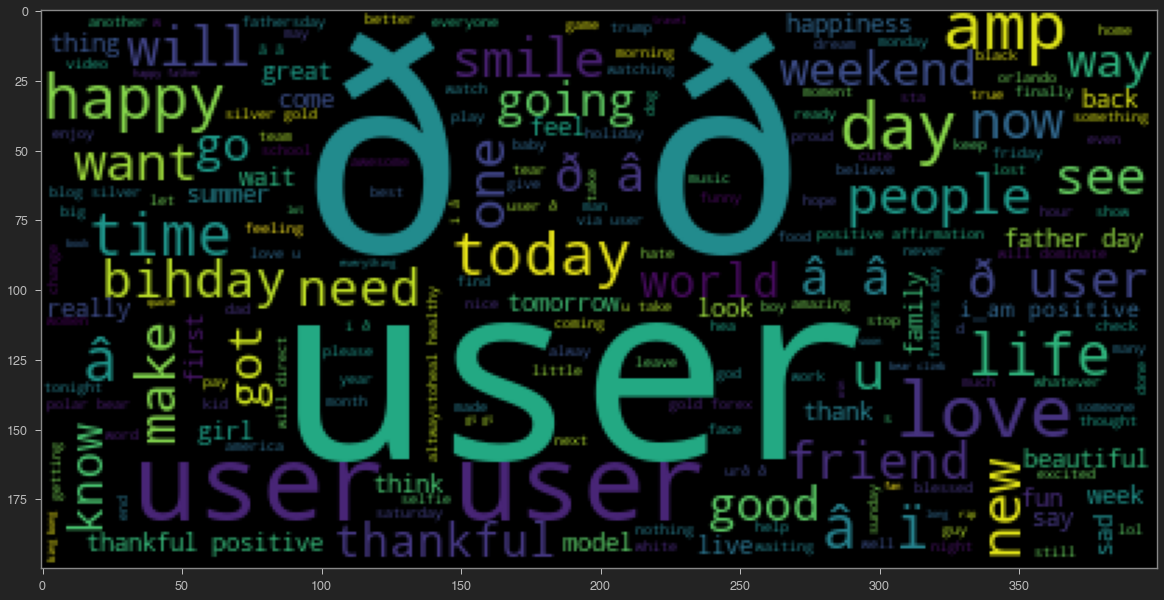

In [36]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentence_as_one))

In [37]:
# lets plot the wordcloud of the negative labelled comments

negative.head()

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104


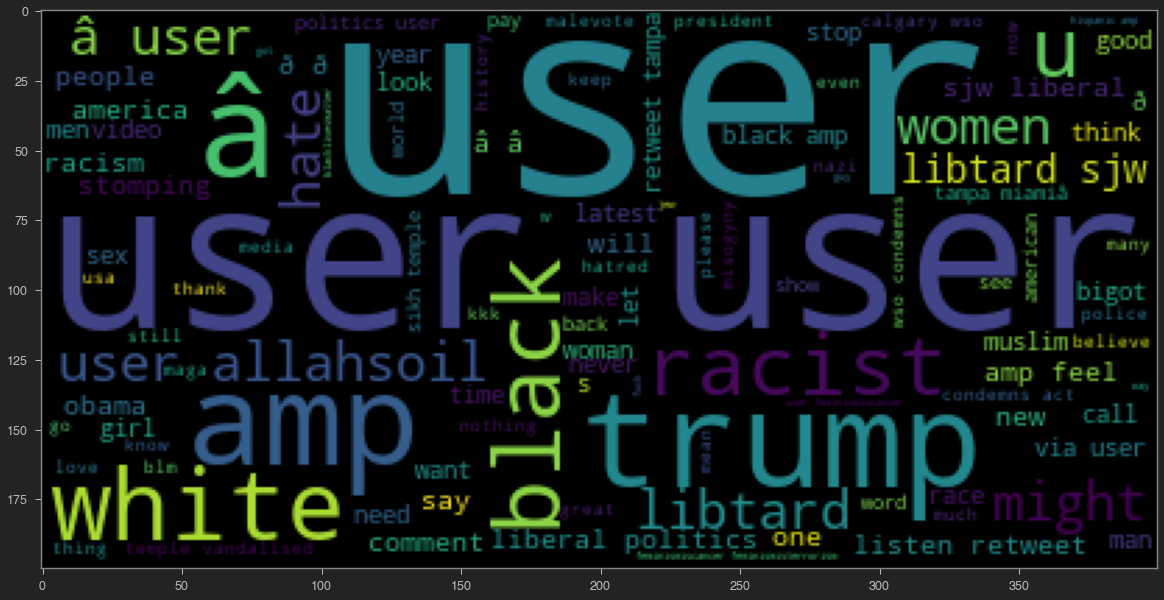

In [38]:
negative_sent = negative['tweet'].tolist()

all_negative = " ".join(negative_sent)

plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(all_negative))
plt.show()

## remove punctuation

In [39]:
#Lets remove the punctuations from the data, crucial for training the data in ML models

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
Test = 'I love & Machine Learning!' #Lets test this code to remove punctuation from this string set

punc_rem = [i for i in Test if i not in string.punctuation  ]
punc_rem

['I',
 ' ',
 'l',
 'o',
 'v',
 'e',
 ' ',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'L',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g']

In [41]:
punc_rem_join = ''.join(punc_rem)
punc_rem_join

'I love  Machine Learning'

## Remove StopWords

In [42]:
#his him yourself it its ...etc are stopwords

In [43]:
import nltk #natural language toolkit
from nltk.corpus import stopwords

In [44]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
#Lets test a code to remove stop words
test = 'I enjoy coding and programming in artificial language'
stop_words_removed = [ i for i in test.split() if i.lower() not in stopwords.words()   ] #Splitting the string in bunch of words and converting in lower case
stop_words_removed

['enjoy', 'coding', 'programming', 'artificial', 'language']

In [46]:
#mini challenge: Create a pipeline that will remove punctuation then remove stopwords

mini = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations'

punc_rem = [i for i in mini if i not in string.punctuation ]
punc_rem = ''.join(punc_rem)
punc_rem

stopw = [i for i in mini.split() if i.lower() not in stopwords.words('english')  ]
stopw

['mini', 'challenge,', 'teach', 'remove', 'stopwords', 'punctuations']

## Count vectorization

In [47]:
#Counting each unique word based on their occurence in the data usking sklearn

from sklearn.feature_extraction.text import CountVectorizer

In [48]:
sample = ['This is the first paper', 'This paper is the second paper', 'And this is the third one']
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(sample)

print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [49]:
print(x.toarray())

[[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]]


In [50]:
sample2 = ['Hello world', 'Hello Hello world', 'Hello world world world']  #Vectorizer converts everything into lower case
vec2 = CountVectorizer()
x1 = vec2.fit_transform(sample2)
print(vec2.get_feature_names())

['hello', 'world']


In [51]:
print(x1.toarray())

[[1 1]
 [2 1]
 [1 3]]


In [53]:
#Let us now apply all the different stages, remove punc, stopwords and perform CV
#Creating a function for the same

def cleaning(message):
    punc_remov = [ i for i in message if i not in string.punctuation  ]
    punc_remov_join = ''.join(punc_remov)
    words_remov = [ i for i in punc_remov_join.split() if i.lower() not in stopwords.words('english')   ]
    return words_remov
    

In [55]:
#Lets pass our dataset through this function:

tweets_cleaned = tweets_df['tweet'].apply(cleaning)

print(tweets_cleaned[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [56]:
#Comparing with the original data

print(tweets_df['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [61]:
from sklearn.feature_extraction.text import CountVectorizer
#Define the cleaning pipeline we defined earlier
vector = CountVectorizer(analyzer=cleaning, dtype=np.uint8)
tweets_cv = vector.fit_transform(tweets_df['tweet'])

In [63]:
#print(vector.get_feature_names())

In [64]:
print(tweets_cv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [65]:
tweets_cv.shape

(31962, 47386)

In [68]:
X = pd.DataFrame(tweets_cv.toarray()) #Lets convert the array to a dataframe to start taining our model
X.head()

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
y = tweets_df['label']
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

## Naive Bayes classifier 

In [71]:
X.shape

(31962, 47386)

In [72]:
y.shape

(31962,)

In [74]:
#Lets split the data in train and test

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [76]:
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

In [78]:
#Lets plot the results in a confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
y_pred = NB_classifier.predict(x_test)

<AxesSubplot:>

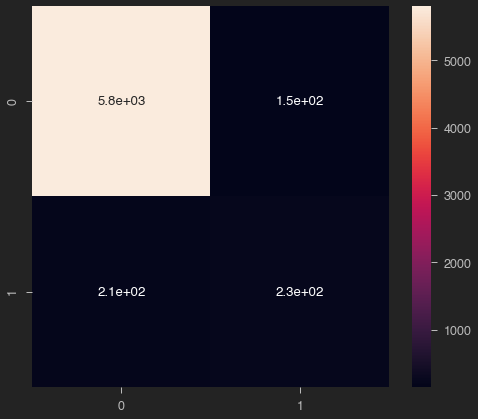

In [79]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [80]:
#Lets get the classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5953
           1       0.60      0.52      0.55       440

    accuracy                           0.94      6393
   macro avg       0.78      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393

